In [11]:
#https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

In [12]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# load data
filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

data = dataframe
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

print("X",X)
print("Y",Y)

X [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
Y [1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1.

# 1. Filter method - information gain

In [14]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

importances = mutual_info_classif(X,Y)
print("importances",importances)



importances [0.04969811 0.13407506 0.00523968 0.         0.02609568 0.06264512
 0.01403828 0.06220398]


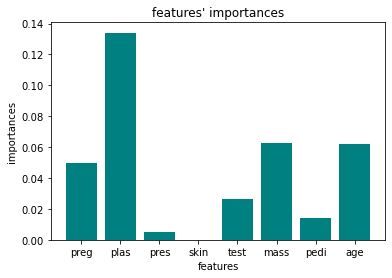

In [15]:
feature_names = dataframe.columns
feature_names = feature_names[0:len(dataframe.columns)-1]

x = feature_names
value_list = importances

x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, value_list, color='teal')
plt.xlabel("features")
plt.ylabel("importances")
plt.title("features' importances")
plt.xticks(x_pos, x)

plt.show()

# 1. Filter method -Chi-square Test

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_cat = X.astype(int)

chi2_features = SelectKBest(chi2, k=3)
X_kbest_features = chi2_features.fit_transform( X_cat, Y)
#print("X_kbest_features",X_kbest_features)
supports = chi2_features.get_support()

print("supports", supports)

feature_names = dataframe.columns
feature_names = feature_names[0:8]
print("all features", feature_names)
 
print("Selected features", feature_names[supports])


supports [False  True False False  True False False  True]
all features Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')
Selected features Index(['plas', 'test', 'age'], dtype='object')


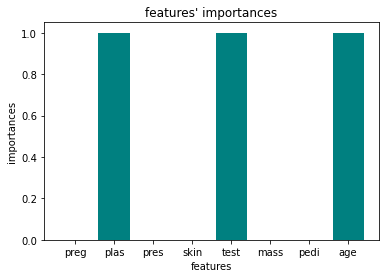

In [17]:
importances = supports ==True

feature_names = dataframe.columns
feature_names = feature_names[0:len(dataframe.columns)-1]

x = feature_names
value_list = importances

x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, value_list, color='teal')
plt.xlabel("features")
plt.ylabel("importances")
plt.title("features' importances")
plt.xticks(x_pos, x)

plt.show()

In [18]:
print(" old feature number:", X_cat.shape[1])
print(" reduced feature number:", X_kbest_features.shape[1])
print("")
print("X_cat", X_cat[0:5])
print("X_kbest_features", X_kbest_features[0:5])


 old feature number: 8
 reduced feature number: 3

X_cat [[  6 148  72  35   0  33   0  50]
 [  1  85  66  29   0  26   0  31]
 [  8 183  64   0   0  23   0  32]
 [  1  89  66  23  94  28   0  21]
 [  0 137  40  35 168  43   2  33]]
X_kbest_features [[148   0  50]
 [ 85   0  31]
 [183   0  32]
 [ 89  94  21]
 [137 168  33]]


# 1.Filter Method - Correlation Coefficient

<AxesSubplot:>

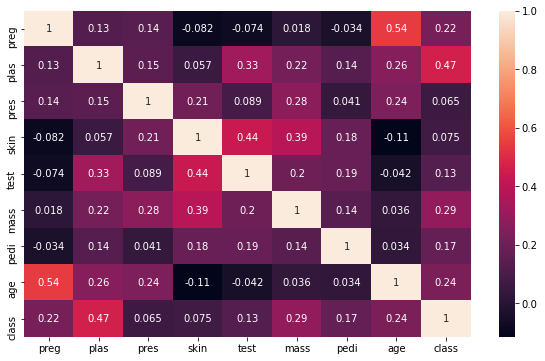

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

cor = dataframe.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor, annot=True)


<AxesSubplot:>

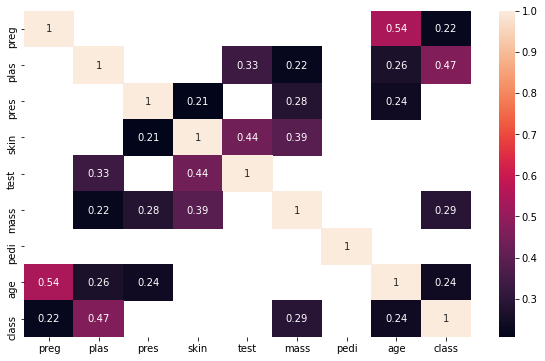

In [20]:

cor = cor[cor>0.20]
plt.figure(figsize=(10,6))
sns.heatmap(cor, annot=True)


# 1.Filter method -Variance Threshold

In [21]:
from sklearn.feature_selection import VarianceThreshold

X = array[:,0:8]

v_threshold = VarianceThreshold(threshold=16)
v_threshold.fit(X)

print("support", v_threshold.get_support())
print("columns", dataframe.columns)

support [False  True  True  True  True  True False  True]
columns Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')


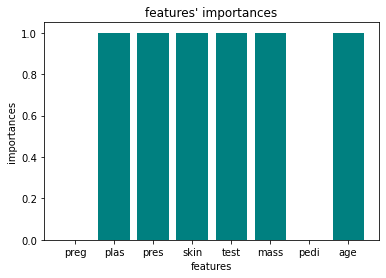

In [22]:
importances = v_threshold.get_support() ==True

feature_names = dataframe.columns
feature_names = feature_names[0:len(dataframe.columns)-1]

x = feature_names
value_list = importances

x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, value_list, color='teal')
plt.xlabel("features")
plt.ylabel("importances")
plt.title("features' importances")
plt.xticks(x_pos, x)

plt.show()

# 1.Filter method - Mean Absolute Difference (MAD)

<BarContainer object of 8 artists>

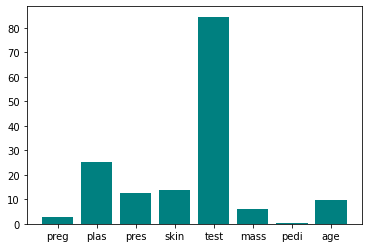

In [23]:
import numpy as np

mean_abs_diff = np.sum( np.abs(X-np.mean(X,axis=0)), axis=0)/X.shape[0]

feature_names = dataframe.columns
feature_names = feature_names[0:8]
#plt.bar( np.arange(X.shape[1]) , mean_abs_diff, color='teal')
plt.bar( feature_names , mean_abs_diff, color='teal')

# 2.Wrapper Methods - Forward Feature Selection

In [24]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

#lr = LogisticRegression()
lr = LogisticRegression(class_weight="balanced", solver="lbfgs",random_state=42, n_jobs=-1,max_iter=500)

ffs = SequentialFeatureSelector(lr, k_features="best",forward=True, n_jobs=-1)
ffs.fit(X,Y)

features  = list(ffs.k_feature_names_)
features = list(map(int, features))
print("features",features)

features [0, 1, 2, 5, 6]


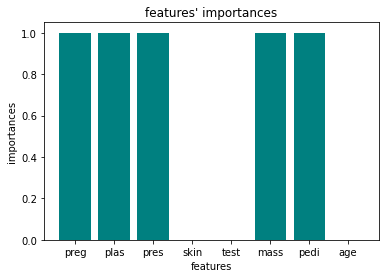

In [25]:
value_list = [0,0,0,0,0,0,0,0]
for i in features:
    value_list[i] = 1
    
feature_names = dataframe.columns
feature_names = feature_names[0:len(dataframe.columns)-1]

x = feature_names
#value_list = importances

x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, value_list, color='teal')
plt.xlabel("features")
plt.ylabel("importances")
plt.title("features' importances")
plt.xticks(x_pos, x)

plt.show()

In [26]:
#old model

from sklearn.metrics import accuracy_score
lr.fit(X, Y)
y_pred = lr.predict(X)

print("accuracy_score",accuracy_score(Y, y_pred))

accuracy_score 0.7578125


In [27]:
#new model
Xnew = X[:,features]
print("Xnew", Xnew)

lr.fit(Xnew, Y)
y_pred=lr.predict(Xnew)
print("accuracy_score",accuracy_score(Y, y_pred))

Xnew [[  6.    148.     72.     33.6     0.627]
 [  1.     85.     66.     26.6     0.351]
 [  8.    183.     64.     23.3     0.672]
 ...
 [  5.    121.     72.     26.2     0.245]
 [  1.    126.     60.     30.1     0.349]
 [  1.     93.     70.     30.4     0.315]]
accuracy_score 0.7721354166666666


# 2.Wrapper Methods - Backward Feature Selection

In [28]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight="balanced", solver="lbfgs",random_state=42, n_jobs=-1,max_iter=500)
lr.fit(X,Y)
bfs = SequentialFeatureSelector( lr, k_features="best", forward=False, n_jobs=-1)
bfs.fit(X,Y)

features  = list(ffs.k_feature_names_)
features = list(map(int, features))
print("features",features)

features [0, 1, 2, 5, 6]


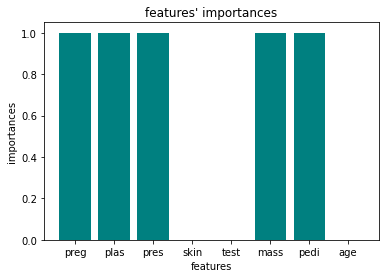

In [29]:
value_list = [0,0,0,0,0,0,0,0]
for i in features:
    value_list[i] = 1
    
feature_names = dataframe.columns
feature_names = feature_names[0:len(dataframe.columns)-1]

x = feature_names
#value_list = importances

x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, value_list, color='teal')
plt.xlabel("features")
plt.ylabel("importances")
plt.title("features' importances")
plt.xticks(x_pos, x)

plt.show()

In [30]:
#old model

from sklearn.metrics import accuracy_score
lr.fit(X, Y)
y_pred = lr.predict(X)

print("accuracy_score",accuracy_score(Y, y_pred))

accuracy_score 0.7578125


In [31]:
#new model

Xnew = X[:,features]
print("Xnew", Xnew)

lr.fit(Xnew, Y)
y_pred=lr.predict(Xnew)
print("accuracy_score",accuracy_score(Y, y_pred))

Xnew [[  6.    148.     72.     33.6     0.627]
 [  1.     85.     66.     26.6     0.351]
 [  8.    183.     64.     23.3     0.672]
 ...
 [  5.    121.     72.     26.2     0.245]
 [  1.    126.     60.     30.1     0.349]
 [  1.     93.     70.     30.4     0.315]]
accuracy_score 0.7721354166666666


# 2.Wrapper Methods - Exhaustive Feature Selection

In [32]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestClassifier

efs = ExhaustiveFeatureSelector( RandomForestClassifier(),
                               min_features=4,max_features=8,scoring="roc_auc", cv=2)
efs = efs.fit(X,Y)


Features: 163/163

In [33]:

print("feature index list", list(efs.best_idx_))

selected_features = X[:, list(efs.best_idx_)]
print("selected_features",selected_features)
print("score", efs.best_score_)

feature index list [0, 1, 2, 5, 6, 7]
selected_features [[  6.    148.     72.     33.6     0.627  50.   ]
 [  1.     85.     66.     26.6     0.351  31.   ]
 [  8.    183.     64.     23.3     0.672  32.   ]
 ...
 [  5.    121.     72.     26.2     0.245  30.   ]
 [  1.    126.     60.     30.1     0.349  47.   ]
 [  1.     93.     70.     30.4     0.315  23.   ]]
score 0.8292238805970149


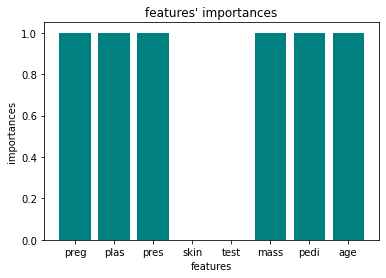

In [34]:
value_list = [0,0,0,0,0,0,0,0]
for i in list(efs.best_idx_):
    value_list[i] = 1
    
feature_names = dataframe.columns
feature_names = feature_names[0:len(dataframe.columns)-1]

x = feature_names
#value_list = importances

x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, value_list, color='teal')
plt.xlabel("features")
plt.ylabel("importances")
plt.title("features' importances")
plt.xticks(x_pos, x)

plt.show()

In [35]:
feature_names = dataframe.columns
feature_names = feature_names[0:8]
print("selected feature_names",feature_names[list(efs.best_idx_)])


selected feature_names Index(['preg', 'plas', 'pres', 'mass', 'pedi', 'age'], dtype='object')


# 2.Wrapper Methods -Recursive Feature Elimination

In [36]:
from sklearn.feature_selection import RFE
lr = LogisticRegression(class_weight="balanced", solver="lbfgs",random_state=42, n_jobs=-1,max_iter=500)

ref=RFE(lr, n_features_to_select=5)
ref.fit(X,Y)


RFE(estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=500,
                                 multi_class='auto', n_jobs=-1, penalty='l2',
                                 random_state=42, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

In [37]:
y_pred=ref.predict(X)
print("accuracy_score",accuracy_score(Y, y_pred))

accuracy_score 0.7604166666666666


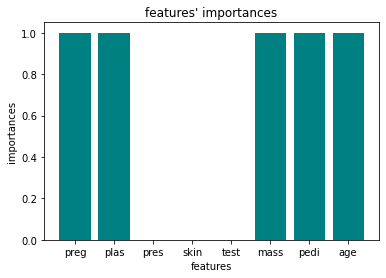

In [38]:
importances  = ref.support_ == True

feature_names = dataframe.columns
feature_names = feature_names[0:len(dataframe.columns)-1]

x = feature_names
value_list = importances

x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, value_list, color='teal')
plt.xlabel("features")
plt.ylabel("importances")
plt.title("features' importances")
plt.xticks(x_pos, x)

plt.show()

# 3.Embedded Methods - LASSO Regularization (L1)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

logistic = LogisticRegression(C=1, penalty="l1", solver="liblinear")
model = SelectFromModel(logistic)#, prefit=True)         
model.fit(X,Y)
supports = model.get_support()

print("support",supports)



support [ True  True  True  True  True  True  True  True]


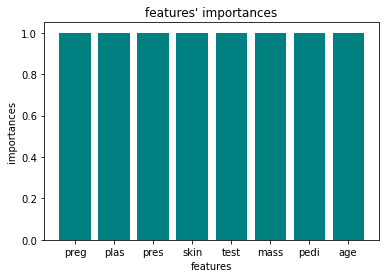

In [40]:
importances = supports ==True

feature_names = dataframe.columns
feature_names = feature_names[0:len(dataframe.columns)-1]

x = feature_names
value_list = importances

x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, value_list, color='teal')
plt.xlabel("features")
plt.ylabel("importances")
plt.title("features' importances")
plt.xticks(x_pos, x)

plt.show()

In [41]:
feature_names = dataframe.columns
feature_names = feature_names[0:8]

selected_features = feature_names[ supports]
print("selected_features",selected_features)

selected_features Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')


In [42]:
#new model

X_new= model.transform(X)
print("X_new",X_new)

logistic.fit( X_new,Y)
y_pred=logistic.predict(X_new)
print("accuracy_score",accuracy_score(Y, y_pred))

X_new [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
accuracy_score 0.7799479166666666


# 3.Embedded Methods - Random Forest Importance

In [43]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=340)
model.fit(X,Y)
importances = model.feature_importances_

feature_names = dataframe.columns
feature_names = feature_names[0:8]
final_df = pd.DataFrame({"Features":feature_names, "Importances":importances})
#final_df = final_df.set_index ("Importances")
final_df.head(10)

,Features,Importances
0,preg,0.087544
1,plas,0.257354
2,pres,0.088770
3,skin,0.067814
4,test,0.074072
5,mass,0.163669
6,pedi,0.124293
7,age,0.136483


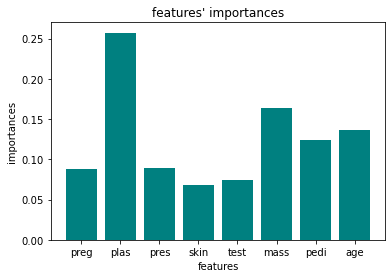

In [44]:

feature_names = dataframe.columns
feature_names = feature_names[0:len(dataframe.columns)-1]

x = feature_names
value_list = importances

x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, value_list, color='teal')
plt.xlabel("features")
plt.ylabel("importances")
plt.title("features' importances")
plt.xticks(x_pos, x)

plt.show()

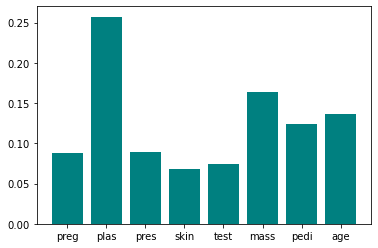

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(final_df["Features"], final_df["Importances"], color='teal')
plt.show()